In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error 
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 20201107

In [3]:
df = pd.read_csv('energy_appliances_standard.csv')
y = df["Appliances"]
X =  df.drop("Appliances",axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_STATE)

In [4]:
XGB_opt = XGBRegressor(learning_rate = 0.1,  
                            max_depth =  7,
                            n_estimators = 450,
                            verbosity=1,                  # If to show more errors or not.
                            objective='reg:squarederror',       # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=RANDOM_STATE        # Seed
                            )


XGB_opt.fit(Xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.001, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=450, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=20201107, ...)

In [5]:
y_pred_xgb = XGB_opt.predict(Xtest)
err_test_xgb = mean_absolute_percentage_error(y_pred_xgb, ytest)

# Load the second dataset
df_extrapolation = pd.read_csv('energy_appliances_extrapolation.csv')
y_extrapolation = df_extrapolation["Appliances"]
X_extrapolation =  df_extrapolation.drop("Appliances",axis=1)
# Calculate the error over it
y_pred_extrapolation_xgb = XGB_opt.predict(X_extrapolation)
err_extrapolation_xgb = mean_absolute_percentage_error(y_pred_extrapolation_xgb, y_extrapolation)

In [6]:
print("MAPE (test set): %f" % err_test_xgb)
print("MAPE (extrapolation set): %f" % err_extrapolation_xgb)

MAPE (test set): 0.179226
MAPE (extrapolation set): 2.835186


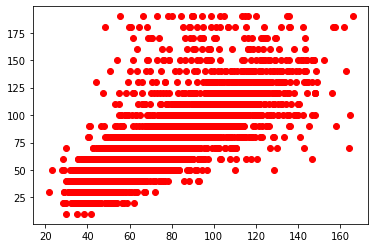

In [12]:
plt.scatter(y_pred_xgb, ytest, c = 'r')
plt.scatter(y_pred_extrapolation_xgb, y_extrapolation, c = 'b')